# DIP Lab 8: Local Histogram Analysis

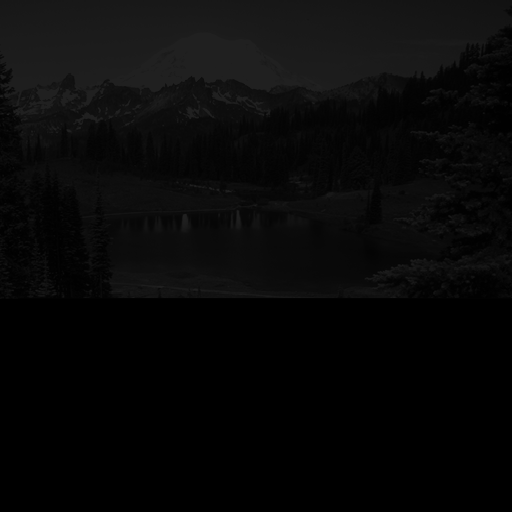

In [33]:
from PIL import Image
from collections import defaultdict

# Open Image
image = Image.open("2.png")
# Convert to Greyscale
image = image.convert('L')
global_image = image
sliding_image = global_image
image

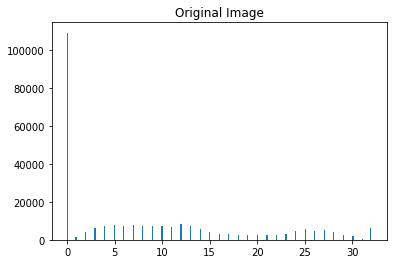

In [34]:
# Plotting Histogram
import matplotlib.pyplot as plt
def histogram(image,text):
    data = list(image.getdata())
    plt.hist(data,bins=255)
    plt.title(text)
    plt.show()
histogram(image,"Original Image")

In [35]:
def histogram_equalization(image,w_start,w_end,h_start,h_end):
    image_size = (w_end - w_start) * (h_end - h_start)

    count_pixels = [[i,0] for i in range(0,256)]
    # Counting Number of pixels 
    for x in range(w_start,w_end):
        for y in range(h_start,h_end):
            pixel_value = image.getpixel((x,y))
            count_pixels[pixel_value][1] += 1

    # Probability Density Function
    count_pixels = [[key,value / image_size] for [key,value] in count_pixels]

    # Cumulative Density Function
    for pixel_value in range(1, 256):
        count_pixels[pixel_value][1] += count_pixels[pixel_value - 1][1]

    # Transformation Function
    transformation = [[key,round(value * 255)] for [key,value] in count_pixels]
    transformation = {transform[0]:transform[1] for transform in transformation}

    # Applying the Transformation on Original Image
    for x in range(w_start,w_end):
        for y in range(h_start, h_end):
            pixel = image.getpixel((x,y))
            pixel = transformation[pixel]
            image.putpixel((x,y), pixel)

### Global Histogram Equalization:

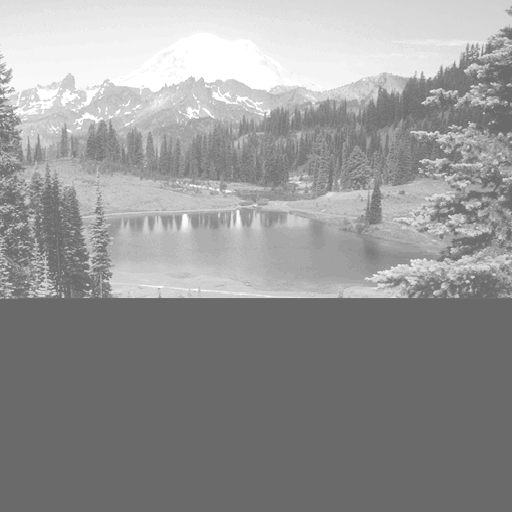

In [36]:
width, height = image.size
histogram_equalization(global_image,0,width,0,height)
global_image

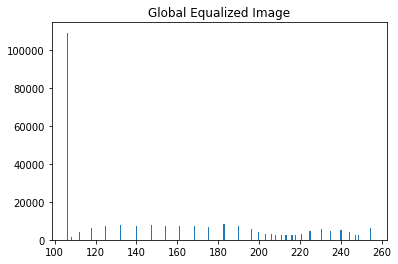

In [37]:
histogram(global_image,"Global Equalized Image")

### Tiling Approach:

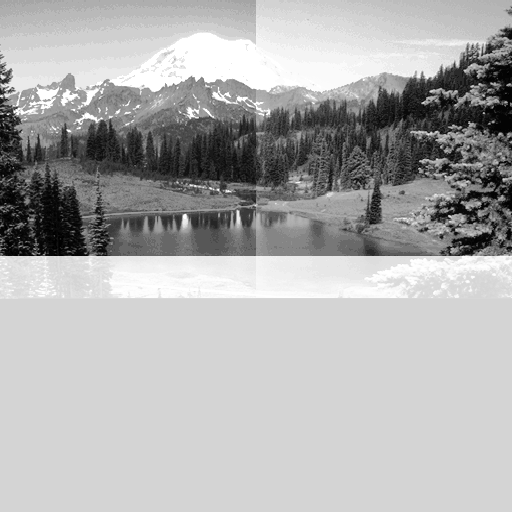

In [38]:
from IPython.display import display
histogram_equalization(image,0,256,0,256)
histogram_equalization(image,0,256,256,512)
histogram_equalization(image,256,512,0,256)
histogram_equalization(image,256,512,256,512)
image

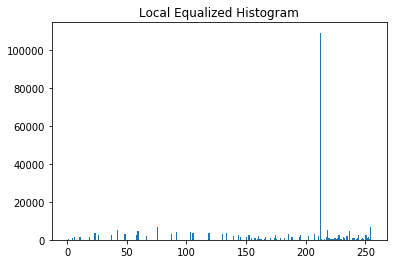

In [39]:
histogram(image,"Local Equalized Histogram")

### Sliding Window Approach:

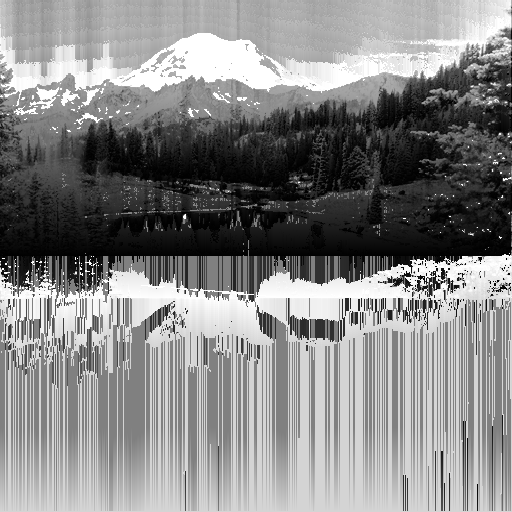

In [40]:
# Sliding Window Algorithm
for x in range(0,511):
    for y in range(0,256):
        histogram_equalization(sliding_image,x,x+1,y,y+256)
sliding_image

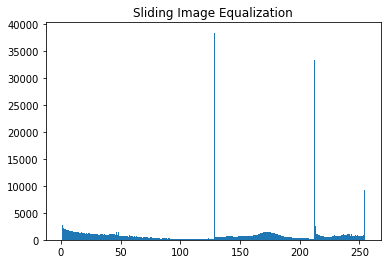

In [41]:
histogram(sliding_image,"Sliding Image Equalization")